In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#sns.set()

In [2]:
# Loading the Data

data = pd.read_csv('../data/creditcard.csv')

In [3]:
data.columns, data.shape

(Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'), (284807, 31))

In [4]:
# 3 random rows

data.sample(n=3)

Time        V1        V2        V3        V4        V5        V6  \
208018  136940.0 -2.179334 -0.961804  2.130980 -0.419865 -1.853877  1.018368   
273216  165485.0 -0.997830  0.497659  1.666997 -1.153429 -0.218177  0.399945   
280429  169523.0 -0.659029  0.172629 -0.863450 -1.888989  1.696498 -1.408985   

              V7        V8        V9  ...         V21       V22       V23  \
208018 -1.931336  1.483949  0.260513  ...   -0.099331  0.073639 -0.500372   
273216  0.886640  0.152188 -0.040489  ...   -0.187167 -0.666235 -0.107449   
280429  0.994647 -0.353702 -1.855857  ...    0.214172  0.428474 -0.583392   

             V24       V25       V26       V27       V28  Amount  Class  
208018 -0.327532  0.401506  0.035101 -0.149348 -0.229371   67.59      0  
273216  0.724145  0.258891 -0.259592 -0.068252  0.040493  129.00      0  
280429 -1.109105  1.578803  0.305200  0.085831 -0.006599   47.85      0  

[3 rows x 31 columns]

In [5]:
# So the data has a time stamp. The minimum is 0 and the max is 172729

data.Time.min(), data.Time.max()

(0.0, 172792.0)

In [6]:
# To check if the data has any null or not


data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Fortunately there aren't any null values

In [2]:
# Utility functions 

def train_test_split(df):
    '''This function takes in the data-frame and splits the data into test and train'''
    # Doing the test train split according to the time won't help us as we have very little class 1
    # df = df.sort_values(by='Time')
    
    #l = int(df.shape[0]*0.8)
    
    data_class1 = df.loc[df.Class == 1] 
    data_class0 = df.loc[df.Class == 0]
    
    l1 = int(data_class1.shape[0]*.8)
    l0 = int(data_class0.shape[0]*.8)
    
    train = pd.concat([data_class1[:l1], data_class0[:l0]]); train = train.sample(frac=1)
    test = pd.concat([data_class1[l1:], data_class0[l0:]]); test = test.sample(frac=1)
    
    y_train = train.Class; y_test = test.Class
    X_train = train.drop(labels=['Class'],axis=1)
    X_test = test.drop(labels=['Class'],axis=1)
    
    return (X_train,y_train,X_test,y_test)

def center_scale(train,test,fet):
    '''This function takes in the test and train data and standardizes them'''
    fet_col = train[fet].tolist()
    mu = np.mean(fet_col); sig = np.std(fet_col)
    
    for i in range(len(fet_col)):
        fet_col[i] = (fet_col[i]-mu)/sig
    train[fet] = fet_col
    fet_col = test[fet].tolist()
    
    for i in range(len(fet_col)):
        fet_col[i] = (fet_col[i]-mu)/sig
    test[fet] = fet_col
    
    return (train,test)

def univariate_analysis(data,fet,l):
    '''This function does the univariate analysis'''
    plt.figure(figsize=(16,l*4))
    print ('Red is FRAUD[Class 1]-----Blue is GENUINE[Class 0]')

    for i,vi in enumerate(data[fet]):
        plt.subplot(l,1,i+1)
        sns.distplot(data[data.Class==0][vi],color='b')
        sns.distplot(data[data.Class==1][vi],color='r')
        plt.xlabel('')
        #plt.ylim(0,max(train_data[train_data.Class==0][vi]*.1))
        plt.title('Dist of feature '+vi)

    plt.savefig('Univariate_analysis_Red_class1_Blue_class0.png')
    plt.show()

In [8]:
# Splitting the data into test train

X_train,y_train,X_test,y_test = train_test_split(data)

In [9]:
print ('Percentage of class in train:\n{}'.format(y_train.value_counts()))
print ('\nPercentage of class in test:\n{}'.format(y_test.value_counts()))

Percentage of class in train:
0    227428
1       417
Name: Class, dtype: int64

Percentage of class in test:
0    56887
1       75
Name: Class, dtype: int64


In [10]:
# Our hypothesis is the time column will not help our data

'''# Eliminating Time column in the data

train = train.drop(labels=['Time'],axis=1)
test = test.drop(labels=['Time'],axis=1)'''

"# Eliminating Time column in the data\n\ntrain = train.drop(labels=['Time'],axis=1)\ntest = test.drop(labels=['Time'],axis=1)"

In [11]:
# Standardizing the test and train data 

print ('===Standardizing these columns===\n')
for i,cn in enumerate(X_train[X_train.columns]):
    print (cn,end='\t')
    X_train, X_test = center_scale(X_train,X_test,cn)

#X_train, X_test = center_scale(X_train,X_test,'Amount')

===Standardizing these columns===

Time	V1	V2	V3	V4	V5	V6	V7	V8	V9	V10	V11	V12	V13	V14	V15	V16	V17	V18	V19	V20	V21	V22	V23	V24	V25	V26	V27	V28	Amount	

In [12]:
print (X_train.columns)

# We don't have class here but we had it in the main dataframe that's because we have extracted the class feature and put it in y_train. Same was done with the test set

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


Red is FRAUD[Class 1]-----Blue is GENUINE[Class 0]


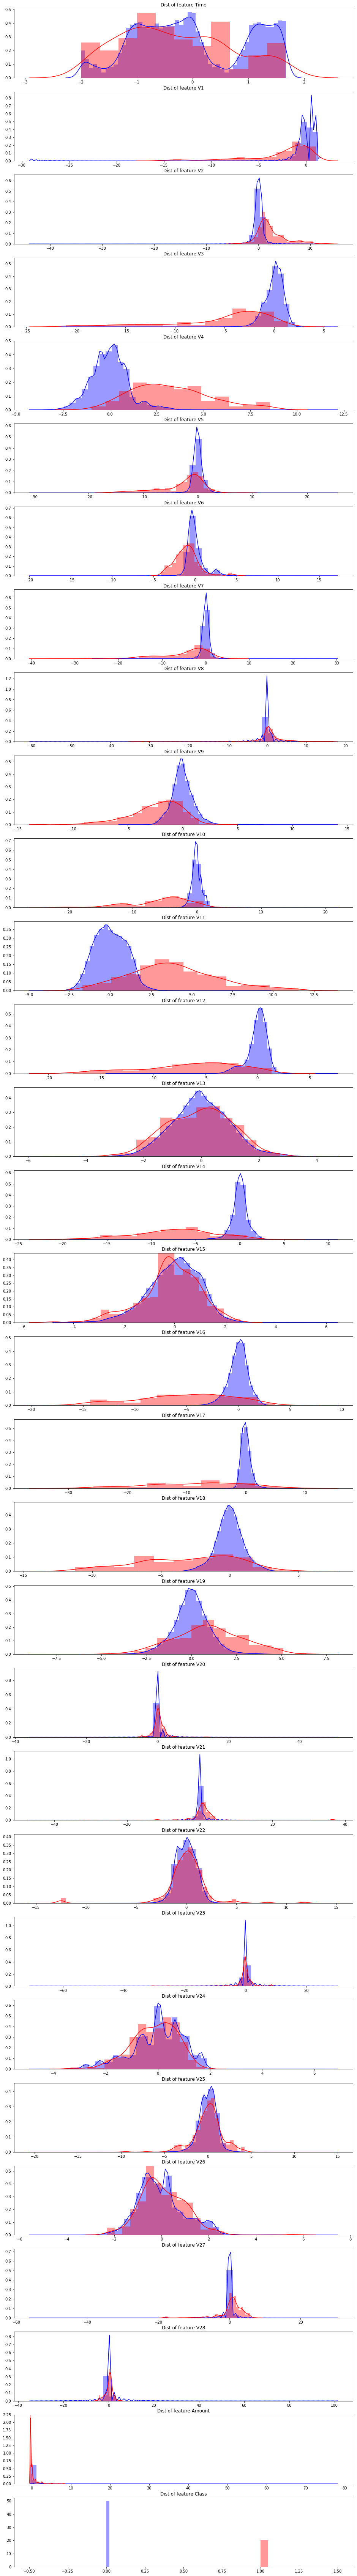

In [13]:
# For feature engineering; Ignore the distribution of class feature

X_train['Class'] = y_train
univariate_analysis(X_train,list(X_train.columns),len(X_train.columns))
X_train = X_train.drop(labels=['Class'],axis=1)

In [3]:
# Utiltiy function and algorithms 

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def metric(observed,predicted):
    '''Prints different metric btaking in observed and predicted value'''
   
    pre_rec = precision_recall_fscore_support(observed,predicted)
    roc_auc = roc_auc_score(observed,predicted)
    print ('---Precision:---\n{}\n---Recall:---\n{}\n---fscore:---\n{}\n---AUC:---\n{}'.format(pre_rec[0],pre_rec[1],pre_rec[2],roc_auc))


def lr_classifier(X_train,X_test,y_train,param):
    '''Implements Logistic regression with hyperparameter tuning'''
    
    lr = LogisticRegression(class_weight= 'balanced',penalty='l1',verbose=1)
    clf = GridSearchCV(lr,param)
    clf.fit(X_train,y_train)

    lr_parameters = lr.get_params()
    lr_parameters['C'] = clf.best_params_['C']

    lr.set_params(**lr_parameters)
    print ('\n---Parameters for LR---\n{}'.format(lr.get_params))

    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    
    return (y_pred)


In [15]:
# Eliminating Time feature

X_train = X_train.drop(labels=['Time'],axis=1)
X_test = X_test.drop(labels=['Time'],axis=1)

In [24]:
# Implementing Logistic regression classifier

initial = datetime.datetime.now()

C = [0.125,0.25,0.5,1,2,4,8]
parameter = {'C':C}

y_pred = lr_classifier(X_train,X_test,y_train,parameter)

print ('\n===METRICS===')
metric(y_test,y_pred)

final = datetime.datetime.now()

print ('Time required =',final-initial)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]
---Parameters for LR---
<bound method BaseEstimator.get_params of LogisticRegression(C=0.125, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=1, warm_start=False)>
[LibLinear]
===METRICS===
---Precision:---
[ 0.99987368  0.04398448]
---Recall:---
[ 0.97401867  0.90666667]
---fscore:---
[ 0.98677684  0.08389883]
---AUC:---
0.9403426676276362
Time required = 0:51:05.436219


In [4]:
# Feature engineering


def feature_engineering(data):
    '''This function creates new features from univariate analysis'''
    
    v1_lt_minus5 = []; v1_gt_minus25 = []; v1_gt_minus5_lt_minus25 = []
    v1 = data.V1.tolist()
    for i in range(len(v1)):
        if(v1[i]<-5):
            v1_lt_minus5.append(1)
        else:
            v1_lt_minus5.append(0)
        if(v1[i]>-5 and v1[i]<-2.5):
            v1_gt_minus5_lt_minus25.append(1)
        else:
            v1_gt_minus5_lt_minus25.append(0)
        if(v1[i]>-2.5):
            v1_gt_minus25.append(1)
        else:
            v1_gt_minus25.append(0)
    
    data['v1_lt_minus5'] = v1_lt_minus5
    data['v1_gt_minus25'] = v1_gt_minus25
    data['v1_gt_minus5_lt_minus25'] = v1_gt_minus5_lt_minus25
    
    v2_gt_3 = []; v2_lt_0 = []; v2_gt_0_lt_3 = [];
    v2 = data.V2.tolist()
    for i in range(len(v2)):
        if(v2[i]>3):
            v2_gt_3.append(1)
        else:
            v2_gt_3.append(0)
        if(v2[i]<0):
            v2_lt_0.append(1)
        else:
            v2_lt_0.append(0)
        if(v2[i]>0 and v2[i]<3):
            v2_gt_0_lt_3.append(1)
        else:
            v2_gt_0_lt_3.append(0)
    
    data['v2_gt_3'] = v2_gt_3
    data['v2_lt_0'] = v2_lt_0
    data['v2_gt_0_lt_3'] = v2_gt_0_lt_3
    
    v3_lt_minus4 = []; v3_gt_0 = []
    v3 = data.V3.tolist()
    for i in range(len(v3)):
        if(v3[i]<-4):
            v3_lt_minus4.append(1)
        else:
            v3_lt_minus4.append(0)
        if(v3[i]>0):
            v3_gt_0.append(1)
        else:
            v3_gt_0.append(0)
    
    data['v3_lt_minus4'] = v3_lt_minus4
    data['v3_gt_0'] = v3_gt_0
    
    v4_gt_5 = []; v4_gt_3125_lt_5 = [];
    v4_gt_1875_lt_3125 = []; v4_gt_0_lt_125 = []; v4_lt_0 = []
    v4 = data.V4.tolist()
    for i in range(len(v4)):
        if(v4[i]>5):
            v4_gt_5.append(1)
        else:
            v4_gt_5.append(0)
        if(v4[i]>3.125 and v4[i]<5):
            v4_gt_3125_lt_5.append(1)
        else:
            v4_gt_3125_lt_5.append(0)
        if(v4[i]>1.875 and v4[i]<3.125):
            v4_gt_1875_lt_3125.append(1)
        else:
            v4_gt_1875_lt_3125.append(0)
        if(v4[i]>0 and v4[i]<1.25):
            v4_gt_0_lt_125.append(1)
        else:
            v4_gt_0_lt_125.append(0)
        if(v4[i]<0):
            v4_lt_0.append(1)
        else:
            v4_lt_0.append(0)
            
    data['v4_gt_5'] = v4_gt_5
    data['v4_gt_3125_lt_5'] = v4_gt_3125_lt_5
    data['v4_gt_1875_lt_3125'] = v4_gt_1875_lt_3125
    data['v4_gt_0_lt_125'] = v4_gt_0_lt_125
    data['v4_lt_0'] = v4_lt_0
    
    v5_lt_minus4 = []; v5_gt_0 = []; v5_gt_minus25_lt_0 = []
    v5 = data.V5.tolist()
    for i in range(len(v5)):
        if(v5[i]<-4):
            v5_lt_minus4.append(1)
        else:
            v5_lt_minus4.append(0)
        if(v5[i]>0):
            v5_gt_0.append(1)
        else:
            v5_gt_0.append(0)
        if(v5[i]>-2.5 and v5[i]<0):
            v5_gt_minus25_lt_0.append(1)
        else:
            v5_gt_minus25_lt_0.append(0)
            
    data['v5_lt_minus4'] = v5_lt_minus4
    data['v5_gt_0'] = v5_gt_0
    data['v5_gt_minus25_lt_0'] = v5_gt_minus25_lt_0
    
    v6_lt_minus1875 = []
    v6 = data.V6.tolist()
    for i in range(len(v6)):
        if(v6[i]<-1.875):
            v6_lt_minus1875.append(1)
        else:
            v6_lt_minus1875.append(0)
    
    data['v6_lt_minus1875'] = v6_lt_minus1875
    
    v7_lt_minus25 = []; v7_gt_minus25=[]
    v7 = data.V7.tolist()
    for i in range(len(v7)):
        if(v7[i]<-2.5):
            v7_lt_minus25.append(1)
        else:
            v7_lt_minus25.append(0)
        if(v7[i]>-2.5):
            v7_gt_minus25.append(1)
        else:
            v7_gt_minus25.append(0)
            
    data['v7_lt_minus25'] = v7_lt_minus25
    data['v7_gt_minus25'] = v7_gt_minus25
    
    v9_lt_minus25 = []; v9_gt_minus125 = []
    v9 = data.V9.tolist()
    for i in range(len(v9)):
        if(v9[i]<-2.5):
            v9_lt_minus25.append(1)
        else:
            v9_lt_minus25.append(0)
        if(v9[i]>-1.25):
            v9_gt_minus125.append(1)
        else:
            v9_gt_minus125.append(0)
        
    data['v9_lt_minus25'] = v9_lt_minus25
    data['v9_gt_minus125'] = v9_gt_minus125
    
    v10_lt_minus25 = []; v10_gt_minus19 =[]
    v10 = data.V10.tolist()
    for i in range(len(v10)):
        if(v10[i]<-2.5):
            v10_lt_minus25.append(1)
        else:
            v10_lt_minus25.append(0)
        if(v10[i]>-1.9):
            v10_gt_minus19.append(1)
        else:
            v10_gt_minus19.append(0)
    
    data['v10_lt_minus25'] = v10_lt_minus25
    data['v10_gt_minus19'] = v10_gt_minus19
    
    v11_gt_3125 = []; v11_lt_15625 = []
    v11 = data.V11.tolist()
    for i in range(len(v11)):
        if(v11[i]>3.125):
            v11_gt_3125.append(1)
        else:
            v11_gt_3125.append(0)
        if(v11[i]<1.5625):
            v11_lt_15625.append(1)
        else:
            v11_lt_15625.append(0)
    
    data['v11_gt_3125'] = v11_gt_3125
    data['v11_lt_15625'] = v11_lt_15625
    
    v12_lt_minus4 = []; v12_gt_minus4_lt_minus2 = []
    v12_gt_minus1 = []
    v12 = data.V12.tolist()
    for i in range(len(v12)):
        if(v12[i]<-4):
            v12_lt_minus4.append(1)
        else:
            v12_lt_minus4.append(0)
        if(v12[i]>-4 and v12[i]<-2):
            v12_gt_minus4_lt_minus2.append(1)
        else:
            v12_gt_minus4_lt_minus2.append(0)
        if(v12[i]>-1):
            v12_gt_minus1.append(1)
        else:
            v12_gt_minus1.append(0)
            
    data['v12_gt_minus1'] = v12_gt_minus1
    data['v12_gt_minus4_lt_minus2'] = v12_gt_minus4_lt_minus2
    data['v12_lt_minus4'] = v12_lt_minus4
            
    # v13 was decided against bucketing
    
    v14_lt_minus375 = []; v14_gt_minus375_lt_minus25 = []
    v14_gt_minus125 = []
    v14 = data['V14'].tolist()
    for i in range(len(v14)):
        if(v14[i]<=-3.75):
            v14_lt_minus375.append(1)
        else:
            v14_lt_minus375.append(0)
        if(v14[i]>-3.75 and v14[i]<=-2.5):
            v14_gt_minus375_lt_minus25.append(1)
        else:
            v14_gt_minus375_lt_minus25.append(0)
        if(v14[i]>=-1.25):
            v14_gt_minus125.append(1)
        else:
            v14_gt_minus125.append(0)
    
    data['v14_gt_minus125'] = v14_gt_minus125
    data['v14_gt_minus375_lt_minus25'] = v14_gt_minus375_lt_minus25
    data['v14_lt_minus375']= v14_lt_minus375
    
    # v13 was decided against bucketing
    
    v16_lt_minus25 = []; v16_gt_minus25_lt_minus1875 = []
    v16_gt_minus125 = []
    v16 = data['V16'].tolist()
    for i in range(len(v16)):
        if(v16[i]<=-2.5):
            v16_lt_minus25.append(1)
        else:
            v16_lt_minus25.append(0)
        if(v16[i]>-2.5 and v16[i]<=-1.875):
            v16_gt_minus25_lt_minus1875.append(1)
        else:
            v16_gt_minus25_lt_minus1875.append(0)
        if(v16[i]>=-1.25):
            v16_gt_minus125.append(1)
        else:
            v16_gt_minus125.append(0)
            
    data['v16_gt_minus125'] = v16_gt_minus125
    data['v16_gt_minus25_lt_minus1875'] = v16_gt_minus25_lt_minus1875
    data['v16_lt_minus25'] = v16_lt_minus25
    
    v17_lt_minus25 = []; v17_gt_minus125 = []
    v17 = data['V17'].tolist()
    for i in range(len(v17)):
        if(v17[i]<=-2.5):
            v17_lt_minus25.append(1)
        else:
            v17_lt_minus25.append(0)
        if(v17[i]>=-1.25):
            v17_gt_minus125.append(1)
        else:
            v17_gt_minus125.append(0)
            
    data['v17_gt_minus125'] = v17_gt_minus125
    data['v17_lt_minus25'] = v17_lt_minus25
    
    v18a = []; v18b = []; v18c = []; v18d = []
    v18 = data['V18'].tolist()
    for i in range(len(v18)):
        if(v18[i]<=-3.125):
            v18a.append(1)
        else:
            v18a.append(0)
        if(v18[i]>=-2.5 and v18[i]<=-1.5625):
            v18b.append(1)
        else:
            v18b.append(0)
        if(v18[i]>=-1.25 and v18[i]<=0.625):
            v18c.append(1)
        else:
            v18c.append(0)
        if(v18[i]>=2.5):
            v18d.append(1)
        else:
            v18d.append(0)
            
    data['v18a'] = v18a
    data['v18b'] = v18b
    data['v18c'] = v18c
    data['v18d'] = v18d
    
    v19a = []; v19b = []; v19c = []
    v19 = data['V19'].tolist()
    for i in range(len(v19)):
        if(v19[i]>=2):
            v19a.append(1)
        else:
            v19a.append(0)
        if(v19[i]>=-1.25 and v19[i]<=.5):
            v19b.append(1)
        else:
            v19b.append(0)
        if(v19[i]>=1.25 and v19[i]<2):
            v19c.append(1)
        else:
            v19c.append(0)
            
    data['v19a'] = v19a
    data['v19b'] = v19b
    data['v19c'] = v19c
    
    # V20 was decided against bucketing
    
    # V21 was decided against bucketing
    
    # V22 was decided against bucketing
    
    # V23 was decided against bucketing
    
    # V24 was decided against bucketing
    
    v25a = []; v25b = []
    v25 = data['V25'].tolist()
    for i in range(len(v25)):
        if(v25[i]<=-1.25):
            v25a.append(1)
        else:
            v25a.append(0)
        if(v25[i]>=1.25):
            v25b.append(1)
        else:
            v25b.append(0)
            
    data['v25a'] = v25a
    data['v25b'] = v25b
    
    # V26 was decided against bucketing
    
    v27a = []; v27b = []
    v27 = data['V27'].tolist()
    for i in range(len(v27)):
        if(v27[i]<=6):
            v27a.append(1)
        else:
            v27a.append(0)
        if(v27[i]>=0.625):
            v27b.append(1)
        else:
            v27b.append(0)
            
    data['v27a'] = v27a
    data['v27b'] = v27b   
    
    # V28 was decided against bucketing
    
    return data

In [5]:
# We need to reload the data before doing feature engineering as out previous data is centered and scaled and we need our original data for feature engineering

data = pd.read_csv('../data/creditcard.csv')

In [6]:
# Splitting the data into test and train

X_train,y_train,X_test,y_test = train_test_split(data)

In [7]:
# Let's remove the time columns

X_train = X_train.drop(labels=['Time'],axis=1)
X_test = X_test.drop(labels=['Time'],axis=1)

print (X_train.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [8]:
# Let's perform feature engineering on our data

X_train = feature_engineering(X_train)
X_test = feature_engineering(X_test)

In [9]:
# Now let's see what are the columns 

print (X_train.columns)
print ('\nNumber of columns =',len(X_train.columns))

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'v1_lt_minus5', 'v1_gt_minus25', 'v1_gt_minus5_lt_minus25', 'v2_gt_3',
       'v2_lt_0', 'v2_gt_0_lt_3', 'v3_lt_minus4', 'v3_gt_0', 'v4_gt_5',
       'v4_gt_3125_lt_5', 'v4_gt_1875_lt_3125', 'v4_gt_0_lt_125', 'v4_lt_0',
       'v5_lt_minus4', 'v5_gt_0', 'v5_gt_minus25_lt_0', 'v6_lt_minus1875',
       'v7_lt_minus25', 'v7_gt_minus25', 'v9_lt_minus25', 'v9_gt_minus125',
       'v10_lt_minus25', 'v10_gt_minus19', 'v11_gt_3125', 'v11_lt_15625',
       'v12_gt_minus1', 'v12_gt_minus4_lt_minus2', 'v12_lt_minus4',
       'v14_gt_minus125', 'v14_gt_minus375_lt_minus25', 'v14_lt_minus375',
       'v16_gt_minus125', 'v16_gt_minus25_lt_minus1875', 'v16_lt_minus25',
       'v17_gt_minus125', 'v17_lt_minus25', 'v18a', 'v18b', 'v18c', 'v18d',
       'v19a', 'v19b', 'v19c', 'v25a

In [10]:
# Standardizing the test and train data 

print ('===Standardizing these columns===\n')
for i,cn in enumerate(X_train[X_train.columns]):
    print (cn,end='\t')
    X_train, X_test = center_scale(X_train,X_test,cn)

===Standardizing these columns===

V1	V2	V3	V4	V5	V6	V7	V8	V9	V10	V11	V12	V13	V14	V15	V16	V17	V18	V19	V20	V21	V22	V23	V24	V25	V26	V27	V28	Amount	v1_lt_minus5	v1_gt_minus25	v1_gt_minus5_lt_minus25	v2_gt_3	v2_lt_0	v2_gt_0_lt_3	v3_lt_minus4	v3_gt_0	v4_gt_5	v4_gt_3125_lt_5	v4_gt_1875_lt_3125	v4_gt_0_lt_125	v4_lt_0	v5_lt_minus4	v5_gt_0	v5_gt_minus25_lt_0	v6_lt_minus1875	v7_lt_minus25	v7_gt_minus25	v9_lt_minus25	v9_gt_minus125	v10_lt_minus25	v10_gt_minus19	v11_gt_3125	v11_lt_15625	v12_gt_minus1	v12_gt_minus4_lt_minus2	v12_lt_minus4	v14_gt_minus125	v14_gt_minus375_lt_minus25	v14_lt_minus375	v16_gt_minus125	v16_gt_minus25_lt_minus1875	v16_lt_minus25	v17_gt_minus125	v17_lt_minus25	v18a	v18b	v18c	v18d	v19a	v19b	v19c	v25a	v25b	v27a	v27b	

In [11]:
# We would drop certain columns which I think aren't useful

X_train = X_train.drop(['V28','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)
X_test = X_test.drop(['V28','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

In [12]:
# Implementing Logistic regression classifier

initial = datetime.datetime.now()

C = [0.125,0.25,0.5,1,2,4,8]
parameter = {'C':C}

y_pred = lr_classifier(X_train,X_test,y_train,parameter)

print ('\n===METRICS===')
metric(y_test,y_pred)

final = datetime.datetime.now()

print ('Time required =',final-initial)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]
---Parameters for LR---
<bound method BaseEstimator.get_params of LogisticRegression(C=0.125, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=1, warm_start=False)>
[LibLinear]
===METRICS===
---Precision:---
[ 0.99971141  0.05460526]
---Recall:---
[ 0.97472873  0.83838384]
---fscore:---
[ 0.98706202  0.10253243]
---AUC:---
0.9065562861792396
Time required = 0:24:50.315084
